In [22]:
print("Hello")

Hello


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
df=pd.read_csv("EasyVisa.csv")

In [25]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [27]:
df.shape

(25480, 12)

In [28]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [29]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features:{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features:['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical features:['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [30]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("---------------------")

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV12       0.003925
EZYV13       0.003925
EZYV14       0.003925
EZYV15       0.003925
EZYV16       0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------
region_of_employment
Northeast    28.237834
South        27.53924

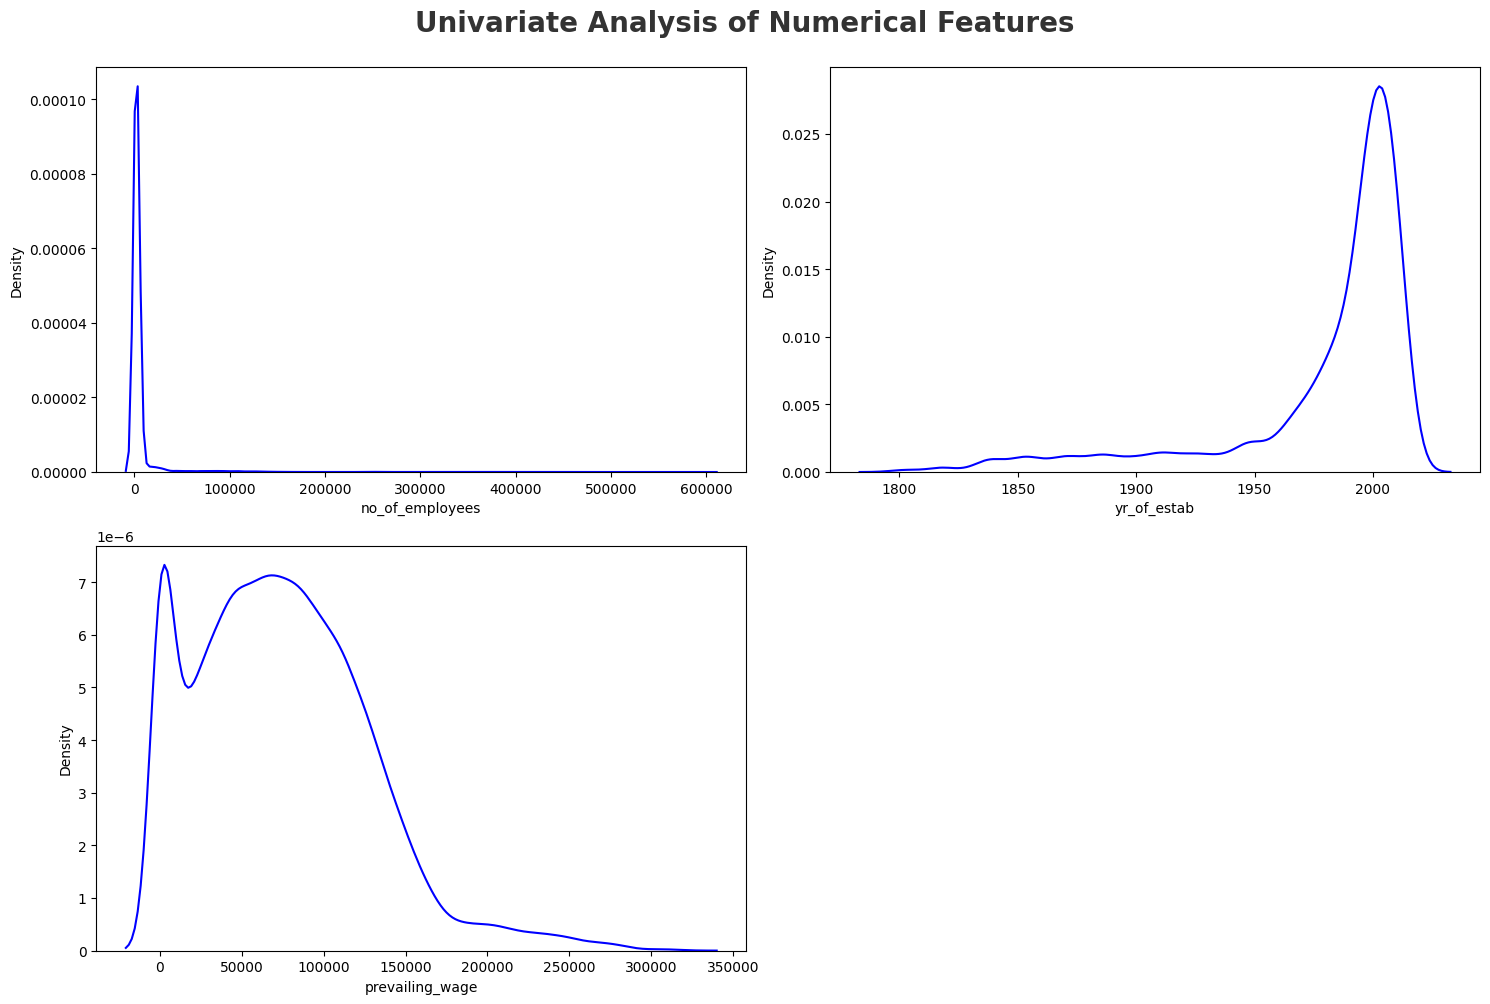

In [31]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

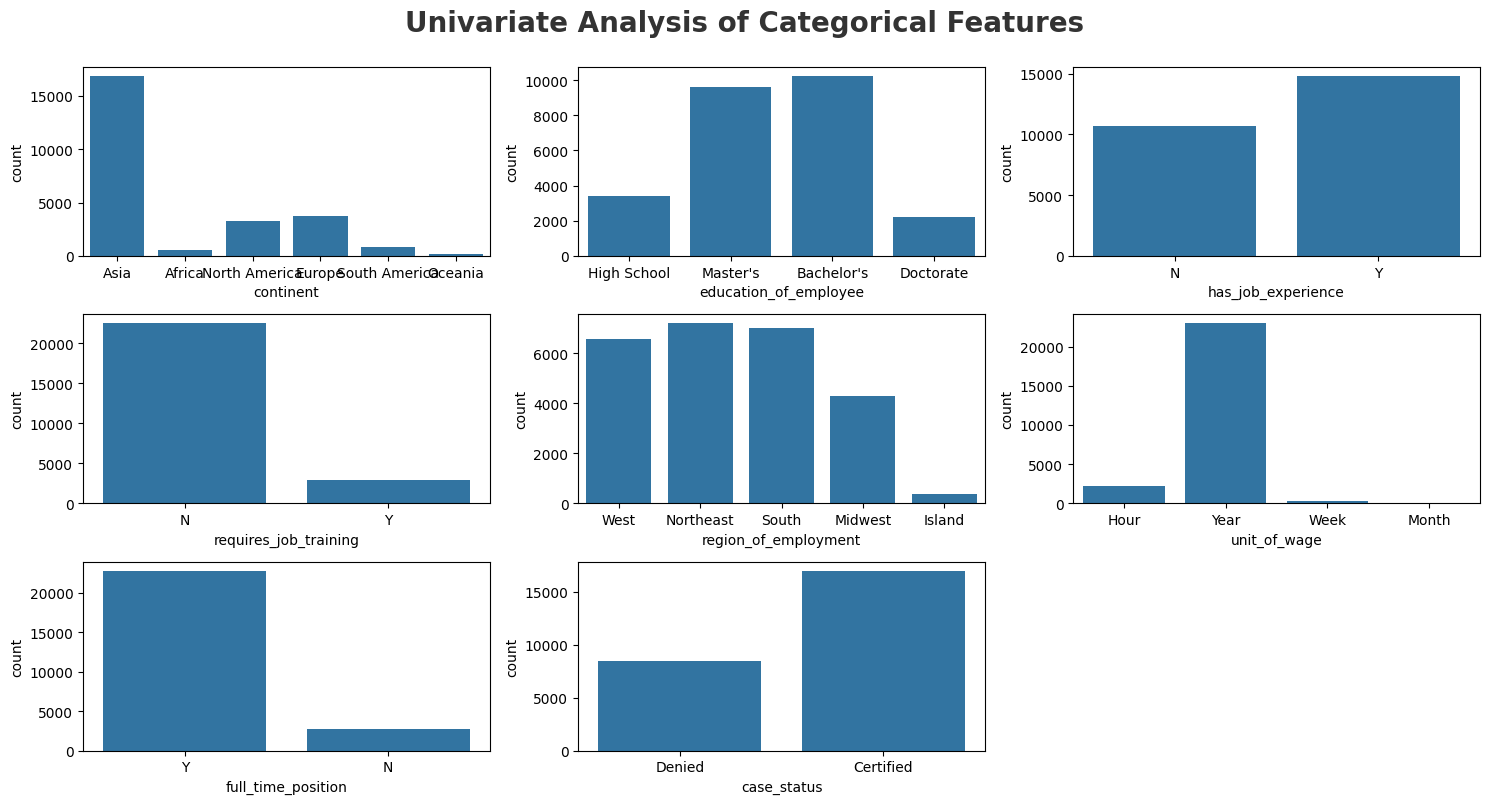

In [32]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [34]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]<0.05:
       chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to reject null hypothesis")
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['column','Hypothesis Result'] 
result

,column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to reject null hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


In [36]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [38]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

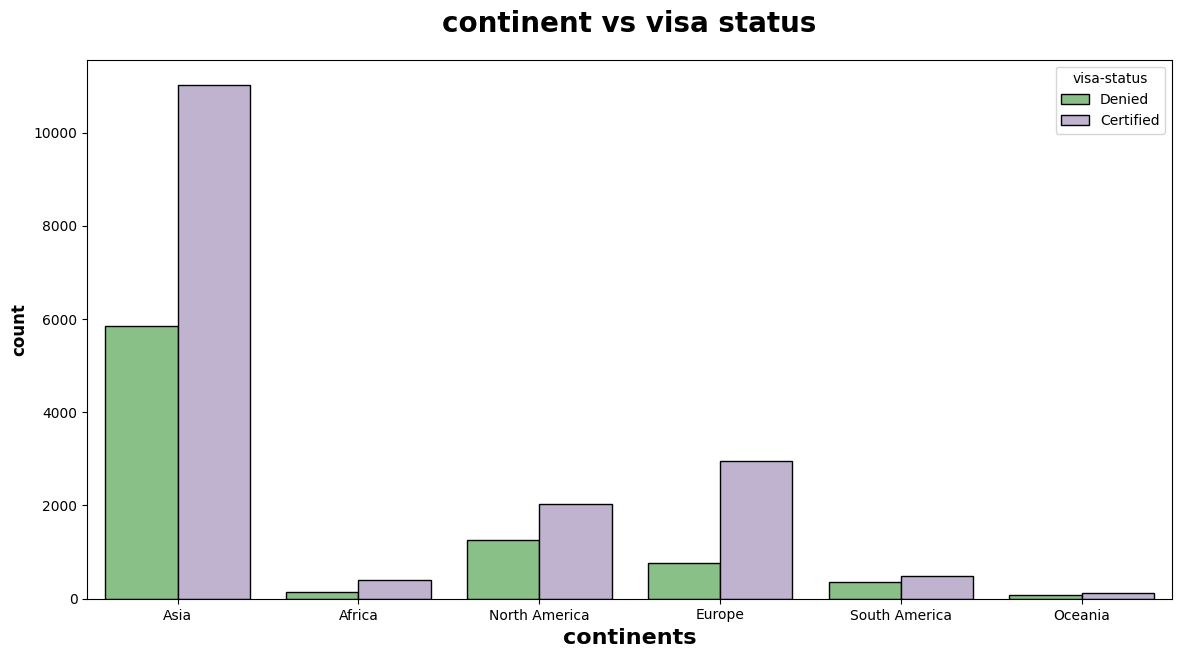

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x='continent',hue="case_status",data=df,ec="black",palette="Accent")
plt.title("continent vs visa status",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("continents",weight="bold",fontsize=16)
plt.legend(title="visa-status",fancybox=True)
plt.show()

In [42]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

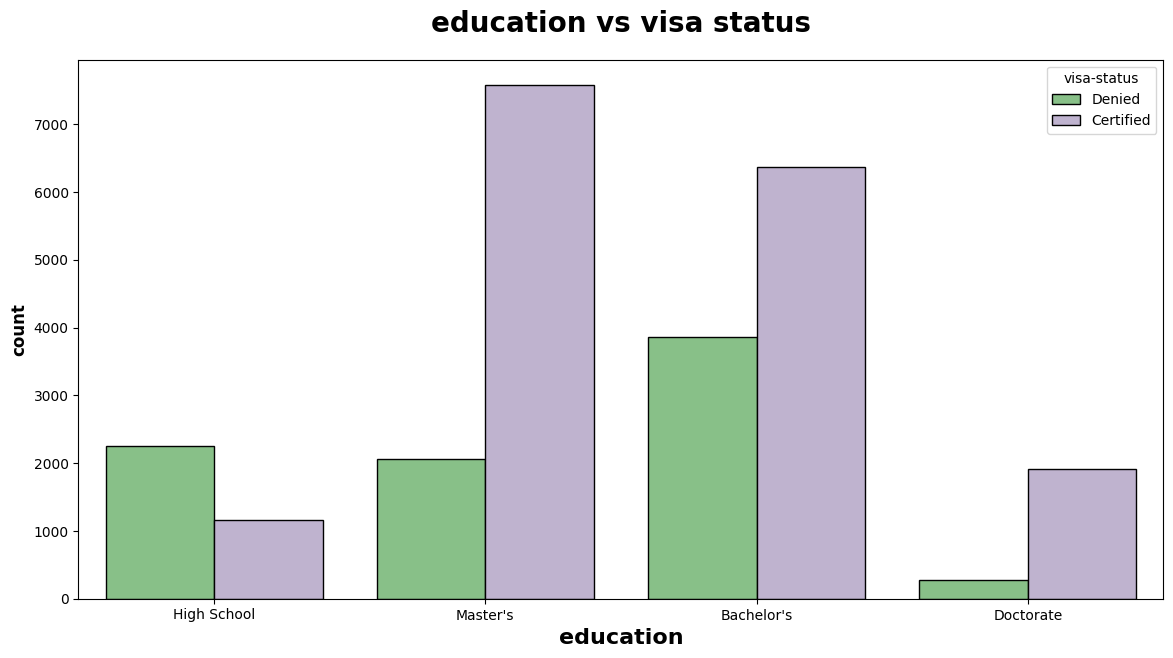

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x='education_of_employee',hue="case_status",data=df,ec="black",palette="Accent")
plt.title("education vs visa status",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("education",weight="bold",fontsize=16)
plt.legend(title="visa-status",fancybox=True)
plt.show()

In [44]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

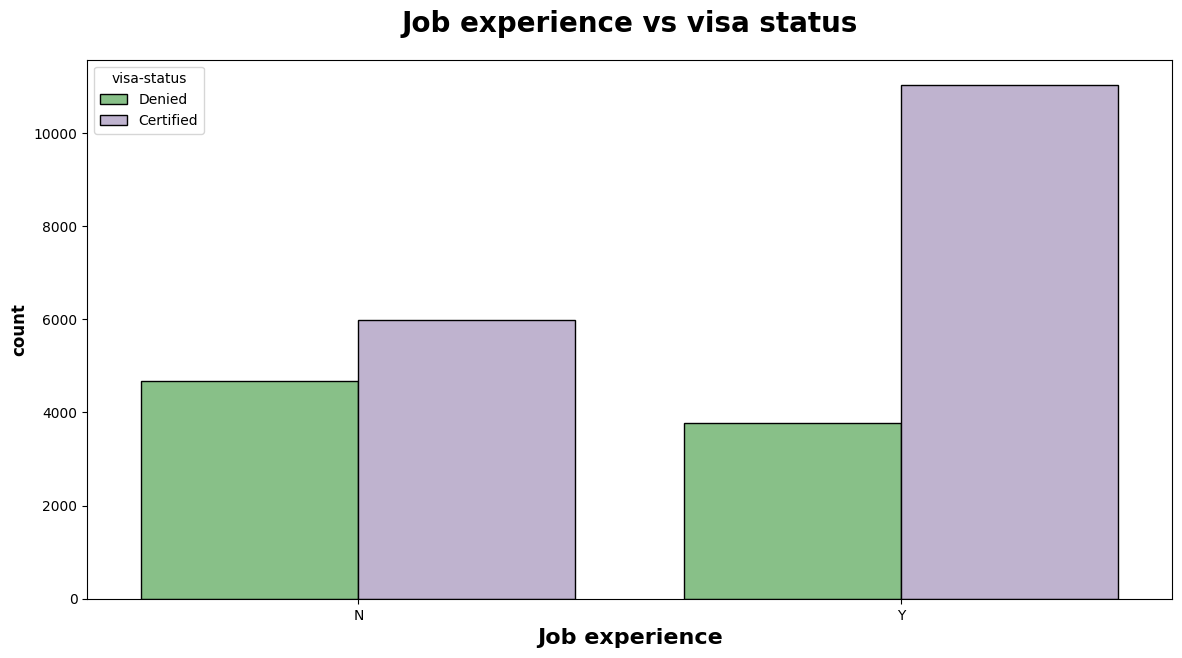

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x='has_job_experience',hue="case_status",data=df,ec="black",palette="Accent")
plt.title("Job experience vs visa status",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("Job experience",weight="bold",fontsize=16)
plt.legend(title="visa-status",fancybox=True)
plt.show()